In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import simpy
from simpy_helpers import Source, Resource , Stats, Entity
from datetime import datetime, timedelta


## Simulation Examlpe

This simulation down below represent a car washing station

In [2]:


class Car:
    def __init__(self, env, lavage, mean_service_time, mean_arrival_number, start_time ,stats , queue_capacity):
        self.env = env
        self.lavage = lavage
        self.mean_installation_time = mean_service_time
        self.mean_arrival_number = mean_arrival_number
        self.start_time = start_time
        self.stats = stats
        self.queue_capacity = queue_capacity

    def arrive(self):

        arrival_time = self.env.now
        real_time = self.start_time + timedelta(minutes=arrival_time)
        print(f"Car arrives at station at: {real_time.strftime('%H:%M:%S')}")
        if len(self.lavage.queue) < queue_capacity :

            with self.lavage.request() as req:
                yield req

                queue_time = self.env.now - arrival_time
                self.stats['total_queue_time'] += queue_time

                installation_time = np.random.exponential(self.mean_installation_time)
                yield self.env.timeout(installation_time)
                real_time = self.start_time + timedelta(minutes=self.env.now)
                print(f"Car installed and starts service at: {real_time:.2f} (Queue Time: {queue_time:.2f} min)")

                washing_times = [3, 5, 6, 10]
                probabilities = [0.3, 0.4, 0.2, 0.1]
                washing_time = np.random.choice(washing_times, p=probabilities)
                yield self.env.timeout(washing_time)
                departure_time = self.env.now
                system_time = departure_time - arrival_time
                self.stats['total_system_time'] += system_time
                self.stats['cars_served'] += 1
                real_time = self.start_time + timedelta(minutes=self.env.now)
                #print(f"Washing ends at: {real_time.strftime('%H:%M:%S')}")
                print(f"finished at: {real_time.strftime('%H:%M:%S')} (System Time: {system_time:.2f} min)")
        else:

            print(" queue is full")

class Station:
    def __init__(self, simulation_time, num_lavage, mean_service_time, mean_arrival_number, start_time , queue_capacity):
        self.env = simpy.Environment()
        self.stations = simpy.Resource(self.env, num_lavage)
        self.mean_service_time = mean_service_time
        self.mean_arrival_number = mean_arrival_number
        self.simulation_time = simulation_time
        self.start_time = start_time
        self.queue_capacity = queue_capacity
        self.stats = {
            'total_queue_time': 0,
            'total_system_time': 0,
            'cars_served': 0
            
        }

    def generate_cars(self):
        cars = 0
        while True:
            arrival = np.random.exponential(1 / self.mean_arrival_number)
            yield self.env.timeout(arrival)
            cars += 1
            print(f"Cars {cars}")
            car = Car(self.env, self.stations, self.mean_service_time, self.mean_arrival_number, self.start_time ,self.stats , self.queue_capacity)
            self.env.process(car.arrive())

    def run(self):
        self.env.process(self.generate_cars())
        self.env.run(until=self.simulation_time)
        
        avg_queue_time = self.stats['total_queue_time'] / self.stats['cars_served'] if self.stats['cars_served'] > 0 else 0
        avg_system_time = self.stats['total_system_time'] / self.stats['cars_served'] if self.stats['cars_served'] > 0 else 0

        print(f"\nSimulation ended. Total cars served: {self.stats['cars_served']}")
        print(f"Average queue time: {avg_queue_time:.2f} minutes")
        print(f"Average system time: {avg_system_time:.2f} minutes")

# Parameters
Nombre_moyen_arrive = 10 / 60
mean_installation_time = 1
stations_number = 1
simulation_time = 8 * 60
start_time = datetime.strptime("08:00:00", "%H:%M:%S")
queue_capacity = 1

station = Station(simulation_time, stations_number, mean_installation_time, Nombre_moyen_arrive, start_time ,queue_capacity)
station.run()

Cars 1
Car arrives at station at: 08:05:05
Car installed and starts service at: .2f (Queue Time: 0.00 min)
Cars 2
Car arrives at station at: 08:09:43
finished at: 08:10:45 (System Time: 5.66 min)
Car installed and starts service at: .2f (Queue Time: 1.03 min)
finished at: 08:13:50 (System Time: 4.12 min)
Cars 3
Car arrives at station at: 08:14:23
Car installed and starts service at: .2f (Queue Time: 0.00 min)
Cars 4
Car arrives at station at: 08:19:05
finished at: 08:20:09 (System Time: 5.77 min)
Car installed and starts service at: .2f (Queue Time: 1.07 min)
finished at: 08:26:34 (System Time: 7.49 min)
Cars 5
Car arrives at station at: 08:47:11
Car installed and starts service at: .2f (Queue Time: 0.00 min)
finished at: 08:50:30 (System Time: 3.33 min)
Cars 6
Car arrives at station at: 09:09:54
Car installed and starts service at: .2f (Queue Time: 0.00 min)
Cars 7
Car arrives at station at: 09:15:20
finished at: 09:16:23 (System Time: 6.49 min)
Car installed and starts service at: .2

In [3]:
"""class Stats(Stats):
    total_times = []
    waiting_times = []
    processing_times = []
    queue_sizes = []

    @staticmethod
    def add_total_time(time):
        Stats.total_times.append(time)

    @staticmethod
    def add_waiting_time(time):
        Stats.waiting_times.append(time)

    @staticmethod
    def add_processing_time(time):
        Stats.processing_times.append(time)

    def add_queue_size_over_time(self, resource):
        Stats.queue_sizes.append(resource)

    @staticmethod
    def get_total_times():
        return Stats.total_times
    
    @staticmethod
    def get_waiting_times():
        return Stats.waiting_times
    
    @staticmethod
    def get_processing_times():
        return Stats.processing_times
    
    @staticmethod
    def queue_size_over_time():
        return Stats.queue_sizes"""

'class Stats(Stats):\n    total_times = []\n    waiting_times = []\n    processing_times = []\n    queue_sizes = []\n\n    @staticmethod\n    def add_total_time(time):\n        Stats.total_times.append(time)\n\n    @staticmethod\n    def add_waiting_time(time):\n        Stats.waiting_times.append(time)\n\n    @staticmethod\n    def add_processing_time(time):\n        Stats.processing_times.append(time)\n\n    def add_queue_size_over_time(self, resource):\n        Stats.queue_sizes.append(resource)\n\n    @staticmethod\n    def get_total_times():\n        return Stats.total_times\n    \n    @staticmethod\n    def get_waiting_times():\n        return Stats.waiting_times\n    \n    @staticmethod\n    def get_processing_times():\n        return Stats.processing_times\n    \n    @staticmethod\n    def queue_size_over_time():\n        return Stats.queue_sizes'

In [149]:
class Ship(Entity):
    def __init__(self, env,attributes , queue_capacity, my_resource, weather_data):
        super().__init__(env , attributes) 
        self.queue_capacity = queue_capacity
        self.my_resource = my_resource
        self.weather_data = weather_data

    def ship_type(self):
        ship_types = {
           "category" : ["A", "B", "C", "D"],
           "capacity type" : [2000 , 3000 , 4000 , 5000],
           "Cargaison" : [13000 , 26000 , 34000 , 51000],
           "Composition" :[0.3 , 0.5 , 0.1, 0.1],
           "Taux de chargement (T/h)" : [800 , 1000 , 1200 , 1500],
           "LOA (m)" : [144 , 180 , 196 , 255]
        }
        ship_type = np.random.choice(["A", "B", "C", "D"], p=[0.6, 0.3, 0.05, 0.05])
        return ship_type

    def Berth_availability(self):
        # Check if there is space at the station
        if self.my_resource.count < self.my_resource.capacity:
            return True 
        return False
    
    def Meterological_accessibility(self, ship_type, current_time):
        current_time = int(current_time)

        # Extract weather data
        wave_height = self.weather_data['wave_height'].iloc[current_time]
        wind_speed = self.weather_data['wind_speed'].iloc[current_time]
        wave_period = self.weather_data['wave_period'].iloc[current_time]

        # Define limits for ship types
        limits = {
            "A": {"wave_height": 3, "wind_speed": 20, "wave_period": 10},
            "B": {"wave_height": 5, "wind_speed": 30, "wave_period": 15},
            "C": {"wave_height": 7, "wind_speed": 40, "wave_period": 20},
            "D": {"wave_height": 10, "wind_speed": 50, "wave_period": 25},
        }

        # Check weather conditions against ship limits
        if ship_type in limits:
            return (wave_height < limits[ship_type]["wave_height"]
                    and wind_speed < limits[ship_type]["wind_speed"]
                    and wave_period < limits[ship_type]["wave_period"])
        
        return False      

    def process(self):
        
        ship_type = self.ship_type()

        # Check if berth and queue are available
        if len(self.my_resource.queue) < self.queue_capacity:
            print(f"Ships in queue: {len(self.my_resource.queue)}")



 
            # Wait until meteorological conditions are satisfied
            max_wait_time = 24 * 60  # Maximum wait time in minutes
            time_for_meterological_conditions = 0
            while not self.Meterological_accessibility(ship_type, self.env.now) and time_for_meterological_conditions < max_wait_time:
                time_for_meterological_conditions += 1
                yield self.env.timeout(1)  # Check every 180min (3h)

            print(f"Time waited for meteorological conditions: {time_for_meterological_conditions//60} hours")

            # Request the resource (berth)
            yield self.wait_for_resource(self.my_resource)

            

            print(f"Ship of type {ship_type} starts docking at time {self.env.now}")

            # Simulate the service time (e.g., docking and unloading)
            yield self.process_at_resource(self.my_resource)
            service_end = self.env.now
            print(f"Ship of type {ship_type} finished at time {service_end}")

            # Release the resource (berth)
            self.release_resource(self.my_resource)
            print(f"Ship of type {ship_type} leaves at time {self.env.now}")

        else:
            print(f"Queue is full. Ship leaves at time {self.env.now}")

class MooringStation(Resource):
    def __init__(self, env, capacity, mean_service_time):
        super().__init__(env, capacity)
        self.mean_service_time = mean_service_time

    def service_time(self, entity):
        """a- La durée considérée pour les manœuvres avant chargement y compris les démarches
        administratives est de 5h environ, considérant le REX de l’OCP au port de Jorf.
        b- Un navire est chargé à une cadence constante (supposé 60 min). Aucune défaillance ou maintenance n'est prise en
        compte pendant le chargement.
        c- l’appareillage des bateaux par rapport à l’amarrage (supposé 15 min).
        """

        service_time = np.random.exponential(self.mean_service_time) 
        charge_time = np.random.exponential(60)
        departure_time = np.random.exponential(15)

        return service_time + charge_time + departure_time
    
class GenerateShips(Source):
    def __init__(self, env,mean_arrival_number, queue_capacity, my_resource, weather_data):
        super().__init__(env)
        self.queue_capacity = queue_capacity
        self.my_resource = my_resource
        self.weather_data = weather_data
        self.mean_arrival_number = mean_arrival_number

    def interarrival_time(self):

        # Time between ship arrivals
        return np.random.exponential(1 / self.mean_arrival_number) 

    def build_entity(self):       
        attributes = {}
        attributes['Ship'] = 'standard'
        attributes['standard'] = 0
        return Ship(self.env,attributes , self.queue_capacity, self.my_resource, self.weather_data)

def generate_weather_data(simulation_time):
    time_points = np.arange(simulation_time)
    
    # Simulating wave height, wind speed, and wave period
    wave_height = np.random.normal(5, 2, simulation_time)  # mean 5 meters, std 2 meters
    wind_speed = np.random.normal(30, 10, simulation_time)  # mean 30 km/h, std 10 km/h
    wave_period = np.random.normal(12, 4, simulation_time)  # mean 12 seconds, std 4 seconds
    
    # Creating a DataFrame for the weather conditions
    weather_data = pd.DataFrame({
        'time': time_points,
        'wave_height': wave_height,
        'wind_speed': wind_speed,
        'wave_period': wave_period
    })
    
    # Ensure no negative values
    weather_data['wave_height'] = weather_data['wave_height'].clip(lower=0)
    weather_data['wind_speed'] = weather_data['wind_speed'].clip(lower=0)
    weather_data['wave_period'] = weather_data['wave_period'].clip(lower=0)
    
    return weather_data

# Parameters
mean_service_time = 5*60  # Average service time in minutes
mean_arrival_number = 30 / (60*24)# Average number of ships arriving per day 
queue_capacity = 30
simulation_time = 24 *60 # Simulate for 30 days
np.random.seed(45)  # For reproducibility

# Generate weather data
weather_data = generate_weather_data(simulation_time)

# Create the SimPy environment
env = simpy.Environment()
mooring_station = MooringStation(env, capacity=2, mean_service_time=mean_service_time)
source = GenerateShips(env,mean_arrival_number, queue_capacity, mooring_station, weather_data)

# Start the ship generation process
env.process(source.start(debug=False))

# Run the simulation
env.run(until=simulation_time)

# Output total times
def minutes_to_hhmm(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{int(hours):02d}:{int(mins):02d}"

# Convert total times to HH:MM format
total_times = Stats.get_total_times()
total_times_hhmm = [minutes_to_hhmm(time) for time in total_times]

# Print the converted times
print(f"Total times in system (HH:MM): {total_times_hhmm}")
print(f"Total ships: {len(total_times_hhmm)}")

Ships in queue: 0
Time waited for meteorological conditions: 0 hours
Ship of type A starts docking at time 57.38444635275615
Ships in queue: 0
Time waited for meteorological conditions: 0 hours
Ship of type B starts docking at time 91.72388337018785
Ships in queue: 0
Time waited for meteorological conditions: 0 hours
Ship of type B finished at time 228.2801250132589
Ship of type B leaves at time 228.2801250132589
Ship of type B starts docking at time 228.2801250132589
Ships in queue: 0
Time waited for meteorological conditions: 0 hours
Ships in queue: 1
Time waited for meteorological conditions: 0 hours
Ships in queue: 2
Time waited for meteorological conditions: 0 hours
Ships in queue: 3
Ships in queue: 3
Time waited for meteorological conditions: 0 hours
Time waited for meteorological conditions: 1 hours
Ships in queue: 5
Time waited for meteorological conditions: 0 hours
Ship of type A finished at time 590.8020684636128
Ship of type A leaves at time 590.8020684636128
Ship of type B 

In [150]:
print(f"Customer average time in simulation = {minutes_to_hhmm(np.mean(Stats.get_total_times())):0.5} ")
print(f"Customer average time waiting = {minutes_to_hhmm(np.mean(Stats.get_waiting_times())):0.5} ")
print(f"Customer average time processing = {minutes_to_hhmm(np.mean(Stats.get_processing_times())):0.5} ")

Customer average time in simulation = 10:18 
Customer average time waiting = 04:49 
Customer average time processing = 05:04 


Text(0.5, 0, 'Time in hours')

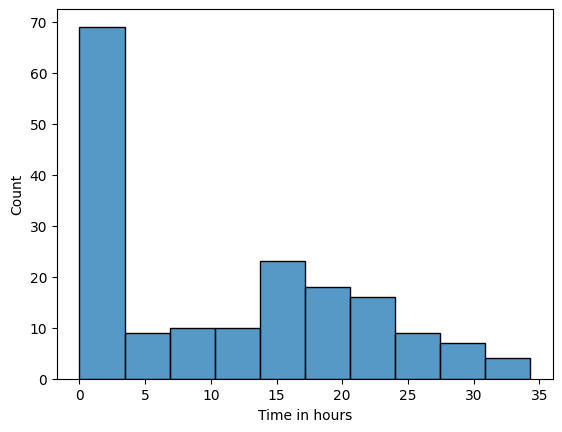

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

system_times = Stats.get_total_times()
system_times_hhmm = [minutes_to_hhmm(time) for time in system_times]



# Define the helper function to convert minutes to hours
def minutes_to_hours(minutes):
    return minutes / 60

# Convert system times to hours for the histogram
system_times_hours = [minutes_to_hours(time) for time in system_times]

# Plot the histogram
sns.histplot(system_times_hours, bins=10)
plt.xlabel('Time in hours')





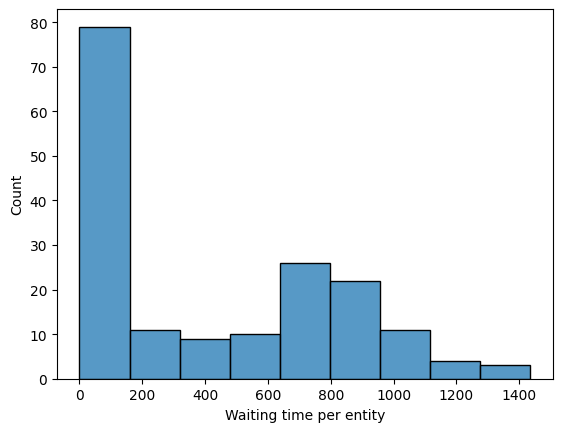

In [132]:
waiting_times = Stats.get_waiting_times()

sns.histplot(waiting_times)
plt.xlabel('Waiting time per entity');

Text(0.5, 0, 'Queue size over time')

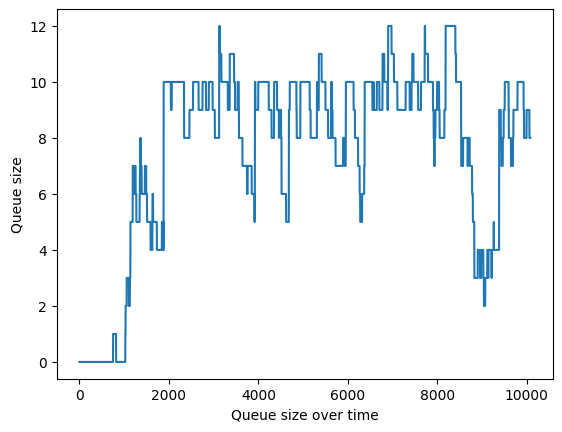

In [133]:
resource_queue = Stats.queue_size_over_time(mooring_station)
sns.lineplot(y=resource_queue,x=range(0,len(resource_queue)))
plt.ylabel('Queue size')
plt.xlabel('Queue size over time')